In [100]:
! pip install numpy pandas matplotlib seaborn sklearn

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
## Part (A) Feature Selection

In [103]:
#read X_train first 3 rows for header
df_X_header = pd.read_csv("X_train.csv", dtype = str, nrows = 3,header = None)

#combine df_X_header by row
X_header = []
for ic in range(len(df_X_header.columns)):
    temp = ""
    for ir in range(len(df_X_header)):
        if(ir != 0):
            temp += "&"
        temp += df_X_header.iloc[ir,ic]
    X_header.append(temp)
    


#read X_train csv files except first 3 rows 
X_train = pd.read_csv("X_train.csv",
                         skiprows = 3,
                         header = None)

X_valid = pd.read_csv("X_valid.csv",
                          skiprows = 3,
                          header = None)

#combine header and the data together
X_train.columns = X_header


#read Y_train csv file
Y_train = pd.read_csv("Y_train.csv")
Y_valid = pd.read_csv("Y_valid.csv")

In [104]:
X_id = X_train.iloc[:,0]
X_feat = X_train.iloc[:,1:]
print(X_train.shape)
print(X_id.shape)
print(X_feat.shape)
print(Y_train.shape)

(16760, 7489)
(16760,)
(16760, 7488)
(16760, 2)


In [105]:
### Note: #3 is new
#Three principle to conduct the features Selection
    #1. Only select the features mean of the variable by time
    #2. Only select the either one feature among the features group with low covariance (< 0.9)
    #3. Only select the K-highest-F-score features that yield the highest R^2 under Multiple Linear Regression model

In [106]:
def featureSelectByMean(df_feat,df_header,cols = None):
    if (cols == None):
        cols = np.full((df_feat.shape[1],), False, dtype = bool)
    for ic in range(len(df_header.columns)):
        if (df_header.iloc[1,ic] == "mean"):
            cols[ic] = True
    
    print("Select features with mean value:")
    print("Original:",df_feat.shape[1],"\tSelected:",np.sum(cols))        
    return df_feat.iloc[:,cols]
    

X_feat = featureSelectByMean(X_feat,df_X_header)
X_feat.describe()

Select features with mean value:
Original: 7488 	Selected: 2496


,alanine aminotransferase&mean&1,alanine aminotransferase&mean&2,alanine aminotransferase&mean&3,alanine aminotransferase&mean&4,alanine aminotransferase&mean&5,alanine aminotransferase&mean&6,alanine aminotransferase&mean&7,alanine aminotransferase&mean&8,alanine aminotransferase&mean&9,alanine aminotransferase&mean&10,...,white blood cell count urine&mean&15,white blood cell count urine&mean&16,white blood cell count urine&mean&17,white blood cell count urine&mean&18,white blood cell count urine&mean&19,white blood cell count urine&mean&20,white blood cell count urine&mean&21,white blood cell count urine&mean&22,white blood cell count urine&mean&23,white blood cell count urine&time_since_measured&0
count,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,...,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000
mean,-0.065219,-0.064588,-0.064803,-0.064101,-0.064031,-0.063712,-0.063905,-0.064175,-0.064640,-0.064856,...,-0.000300,-0.000252,-0.000329,-0.000262,-0.000249,-0.000257,-0.000282,-0.000300,-0.000448,269.869093
std,0.423142,0.428927,0.427698,0.435464,0.436145,0.438468,0.435569,0.432840,0.426678,0.420549,...,0.339446,0.338852,0.338696,0.338709,0.338702,0.338702,0.338711,0.338711,0.338265,315.670695
min,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,...,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,0.000000
25%,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,360.000000
max,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,...,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,2232.000000


In [107]:
def featureSelectByCorr(df_feat,threshold = 0.9):
    corr = df_feat.corr()
    
    cols = np.full((corr.shape[0],), True, dtype = bool)
    for i in range(corr.shape[0],0,-1):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i,j] >= threshold:
                if(cols[j]):
                    cols[j] = False
    print("Select features by filtering features with high covariance","(>= "+str(threshold)+")",":")
    print("Original:",df_feat.shape[1],"\tSelected:",np.sum(cols))
    
    return df_feat.iloc[:,cols]

X_feat = featureSelectByCorr(X_feat,0.9)
X_feat.describe()

Select features by filtering features with high covariance (>= 0.9) :
Original: 2496 	Selected: 397


,alanine aminotransferase&mean&1,alanine aminotransferase&mean&2,alanine aminotransferase&time_since_measured&0,albumin&mean&1,albumin&time_since_measured&0,albumin ascites&mean&1,albumin ascites&time_since_measured&0,albumin pleural&mean&1,albumin pleural&time_since_measured&0,albumin urine&mean&1,...,total protein urine&time_since_measured&0,troponin-i&mean&1,troponin-t&mean&1,troponin-t&time_since_measured&0,venous pvo2&mean&1,weight&mean&1,weight&time_since_measured&0,white blood cell count&mean&1,white blood cell count urine&mean&1,white blood cell count urine&time_since_measured&0
count,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,1.676000e+04,16760.000000,16760.000000,16760.000000,1.676000e+04,...,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000
mean,-0.065219,-0.064588,33.225000,0.034359,46.030847,1.848164e-18,6915.172375,0.000044,8732.591826,8.611515e-20,...,1559.202029,-0.002609,-0.025065,69.243735,-0.000489,-0.014655,27.429415,0.001104,-0.000158,269.869093
std,0.423142,0.428927,38.602299,0.619799,50.040251,5.462116e-02,6261.763074,0.051822,8127.378115,5.516467e-02,...,1779.006089,0.168234,0.504190,85.521628,0.123559,0.812038,35.051215,0.962887,0.338099,315.670695
min,-0.279057,-0.279057,0.000000,-3.131888,0.000000,-1.702985e+00,0.000000,-2.312068,0.000000,-5.691630e-01,...,0.000000,-0.692272,-0.366371,0.000000,-2.765677,-3.517696,0.000000,-1.160785,-0.316046,0.000000
25%,-0.248043,-0.248043,0.000000,0.000000,11.000000,0.000000e+00,2157.000000,0.000000,2232.750000,0.000000e+00,...,398.000000,0.000000,0.000000,11.000000,0.000000,-0.405690,2.000000,-0.414731,0.000000,57.000000
50%,0.000000,0.000000,23.000000,0.000000,25.000000,0.000000e+00,5146.000000,0.000000,6192.000000,0.000000e+00,...,984.000000,0.000000,0.000000,41.000000,0.000000,0.000000,21.000000,-0.120972,0.000000,154.000000
75%,0.000000,0.000000,48.000000,0.000000,69.000000,0.000000e+00,9888.000000,0.000000,13056.000000,0.000000e+00,...,2034.250000,0.000000,0.000000,96.000000,0.000000,0.122018,33.000000,0.228741,0.000000,360.000000
max,10.413320,10.413320,336.000000,3.492301,480.000000,3.469357e+00,31735.000000,1.613770,36853.000000,4.592960e+00,...,11424.000000,3.830272,8.913147,768.000000,3.207278,7.198578,431.000000,54.802581,11.783246,2232.000000


In [108]:
def totalFeatureSelected(X_header, df_selected,X_test):
    cols = np.full(len(X_header), False, dtype = bool)
    for i in range(len(X_header)):
        if X_header[i] in df_selected.columns:
            cols[i] = True
    return X_test.iloc[:,cols]

X_valid_selected = totalFeatureSelected(X_header, X_feat,X_valid)
X_valid_selected.columns = X_feat.columns
print(X_valid.shape)
print(X_valid_selected.shape)

(2394, 7489)
(2394, 397)


In [109]:
#Check the shape of the datasets

print(X_feat.shape)
print(X_valid_selected.shape)
print(Y_train.shape)
print(Y_valid.shape)

(16760, 397)
(2394, 397)
(16760, 2)
(2394, 2)


Feature 0: 3.618516
Feature 1: 3.392003
Feature 2: 5.874906
Feature 3: 133.133801
Feature 4: 3.674738
Feature 5: 1.312398
Feature 6: 0.821595
Feature 7: 0.043298
Feature 8: 1.078813
Feature 9: 0.076064
Feature 10: 6.728922
Feature 11: 0.621451
Feature 12: 44.127926
Feature 13: 8.265027
Feature 14: 0.056494
Feature 15: 1.695382
Feature 16: 6.091145
Feature 17: 6.783093
Feature 18: 8.581927
Feature 19: 4.102740
Feature 20: 130.814498
Feature 21: 21.582855
Feature 22: 6.886366
Feature 23: 25.840405
Feature 24: 15.207156
Feature 25: 16.480091
Feature 26: 0.268327
Feature 27: 0.807124
Feature 28: 15.232806
Feature 29: 0.084106
Feature 30: 0.174613
Feature 31: 0.482518
Feature 32: 1.380168
Feature 33: 0.982933
Feature 34: 0.904074
Feature 35: 0.500101
Feature 36: 1.641905
Feature 37: 0.429605
Feature 38: 0.593302
Feature 39: 0.297361
Feature 40: 0.681865
Feature 41: 0.195450
Feature 42: 0.454811
Feature 43: 0.342549
Feature 44: 0.995247
Feature 45: 4.046048
Feature 46: 6.134406
Feature 47: 5

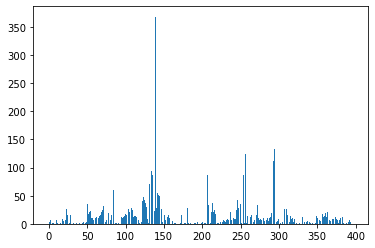

In [110]:
#Task 2 MLR

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

def select_features(X_train, y_train, X_test, k):
    fs = SelectKBest(score_func=f_regression, k=k)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_feat_fs = fs.transform(X_train)
    # transform test input data
    X_valid_fs = fs.transform(X_test)
    return X_feat_fs, X_valid_fs, fs

# configure to select all the features
X_feat_fs, X_valid_fs, fs = select_features(X_feat, Y_train.iloc[:,1], X_valid_selected,'all')

# computing F-scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

# plot the F-scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [111]:
#Check number of features with F-scores >= a certain value

fs_more_than_50 = 0
fs_more_than_40 = 0
fs_more_than_30 = 0
fs_more_than_20 = 0
fs_more_than_10 = 0

for i in range(len(fs.scores_)):
    if fs.scores_[i] >= 50:
        fs_more_than_50 += 1
    if fs.scores_[i] >= 40:
        fs_more_than_40 += 1
    if fs.scores_[i] >= 30:
        fs_more_than_30 += 1
    if fs.scores_[i] >= 20:
        fs_more_than_20 += 1
    if fs.scores_[i] >= 10:
        fs_more_than_10 += 1
    else:
        continue
        
print("No. of features with F-score >= 50:", fs_more_than_50,
     "\nNo. of features with F-score >= 40:", fs_more_than_40,
     "\nNo. of features with F-score >= 30:", fs_more_than_30,
     "\nNo. of features with F-score >= 20:", fs_more_than_20,
     "\nNo. of features with F-score >= 10:", fs_more_than_10)

No. of features with F-score >= 50: 27 
No. of features with F-score >= 40: 35 
No. of features with F-score >= 30: 51 
No. of features with F-score >= 20: 83 
No. of features with F-score >= 10: 159


For k = all :
R^2 score: 0.0748304460151713
RMSE: 1.9182291509636356
For k = 159 :
R^2 score: 0.07357043029620025
RMSE: 1.9195349529578696
For k = 83 :
R^2 score: 0.06639983831754992
RMSE: 1.92694926222196
For k = 51 :
R^2 score: 0.06567881154220101
RMSE: 1.927693217672954
For k = 35 :
R^2 score: 0.06719855658338714
RMSE: 1.9261248092282994
For k = 27 :
R^2 score: 0.058872646564950615
RMSE: 1.9347017234103803


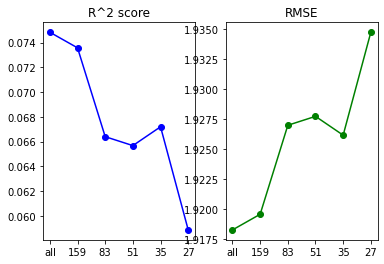

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

k_val_list = ['all', 159, 83, 51, 35, 27] #all = 397
R2_score = []
RMSE_list = []
for k_val in range(len(k_val_list)):
    X_feat_fs, X_valid_fs, fs = select_features(X_feat, Y_train.iloc[:,1], X_valid_selected,k_val_list[k_val])
    #fit data with selected K features to model
    model = LinearRegression()
    model.fit(X_feat_fs, Y_train.iloc[:,1])
    Y_pred = model.predict(X_valid_fs)
    #evaluate predictions
    print("For k =", k_val_list[k_val], ":")
    print("R^2 score:", model.score(X_valid_fs, Y_valid.iloc[:,1]))
    R2_score.append(model.score(X_valid_fs, Y_valid.iloc[:,1]))
    print("RMSE:", np.sqrt(mean_squared_error(Y_valid.iloc[:,1], Y_pred)))
    RMSE_list.append(np.sqrt(mean_squared_error(Y_valid.iloc[:,1], Y_pred)))

fig, ax = plt.subplots(1,2)
ax[0].plot(k_val_list, R2_score, marker='o', color='b')
ax[0].title.set_text('R^2 score')
ax[1].plot(k_val_list, RMSE_list, marker='o', color='g')
ax[1].title.set_text('RMSE')